# Perth basin subdomain generator
Load the numpy array containing the subdomains for all the different types of material properties in the geological model. Then insert into the template input MOOSE file and save it under a different file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Model set up

In [3]:
#Load from file.
geo_file="PB_sub.npy"
geo_array=np.load(geo_file)

## Check the model

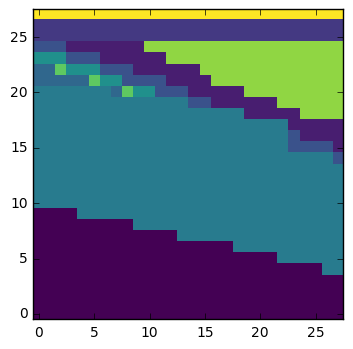

In [15]:
plt.imshow(geo_array[:,0,:],interpolation='nearest', cmap='viridis', origin='lower left')
plt.show()

## Flatten the 3D array

In [11]:
geo_flat = geo_array.flatten()
print(geo_flat.shape)
print(geo_flat.dtype)
print(geo_flat)

(62720,)
int64
[ 0  0  0 ..., 12 12 12]


## Replace magic key string in template file

In [20]:
geo_string="'"+" ".join(str(x) for x in geo_flat)+"'"

#Read the template file with the magic key in place
template="/Users/guilherme/projects/Apex/problems/small_mesh/transient/td_btransient_sperth.i"
with open(template) as file:
    file_str=file.read()
    
#Replace the magic key with the geo model
file_str=file_str.replace('[magic_key]', geo_string)
file_str=file_str.replace('TEMPLATE', '')

#Save the modfied file into a different file
output="/Users/guilherme/projects/Apex/problems/small_mesh/transient/d_btransient_sperth.i"
with open(output, "w") as f:
    f.write(file_str)